In [1]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
#version1 is the best :)_
model1 = load_model('hand_emoji_v5.h5')
print(model1)

In [3]:
def keras_process_image(img):
    image_x = 50
    image_y = 50
    # Taking a copy of the image
    #img =  image.copy()
    # Converting from BGR Colours Space to HSV
    img =  cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

    # Defining HSV Threadholds
    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # Single Channel mask,denoting presence of colours in the about threshold
    skinMask = cv2.inRange(img,lower_threshold,upper_threshold)

    # Cleaning up mask using Gaussian Filter
    skinMask = cv2.GaussianBlur(skinMask,(3,3),0)

    # Extracting skin from the threshold mask
    skin  =  cv2.bitwise_and(img,img,mask=skinMask)
    
    skin = cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)
    (thresh, skin) = cv2.threshold(skin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    #cv2.imwrite('IMG.jpg', skin)
    
    #resizing the input image just to be sure
    img = cv2.resize(skin, (image_x, image_y)) 
    kernel = np.ones((2,2),np.uint8)
    img = cv2.dilate(img, kernel,iterations = 2)
    #img = cv2.erode(img, kernel,iterations = 1)
    
    
    cv2.imwrite('IMG.jpg', img)
    
    '''kernel = np.ones((5,5),np.uint8)
    (thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_bw = ~im_bw
    erosion = cv2.erode(im_bw, kernel,iterations = 2)
    dilation = cv2.dilate(erosion, kernel,iterations = 3)
    #cv2.imwrite('IMG.jpg', dilation)'''
    img1 = np.array(img, dtype=np.float32)
    img1 = np.reshape(img1, (1, image_x, image_y, -1))
    #print(img.shape)
    return img, img1

def keras_predict(model, image):
    processed = image
    pred_prob = model.predict(processed)[0]
    pred_class = list(pred_prob).index(max(pred_prob))
    return max(pred_prob), pred_class

In [4]:
letter_count = {5:'rock', 1:'one', 2:'victory', 3:'ok', 4:'high-five', 8:'thumbs-up'}

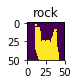

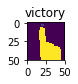

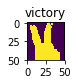

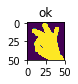

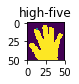

In [5]:
for i in range(5):
    image = cv2.imread("IMG_"+str(i)+".jpg")
    image, img_data = keras_process_image(image)
    cv2.imwrite('newimg'+str(i)+'.jpg', img_data)
    prob, cla = keras_predict(model1, img_data)
    plt.figure(i+1)
    plt.subplot(511+i)
    plt.imshow(image)
    plt.title(letter_count[cla])
    
    #letter_count[pred_class] is getting the tag from the dictionary and saving the image with its name
    #cv2.imwrite("newimg_"+letter_count[pred_class]+".jpg",image)
    #print(letter_count[pred_class])
    